# Question 1
## Occupations 

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
users = pd.read_csv('DAT8.csv', sep ='|')

In [7]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
age_mean = users.groupby('occupation')['age'].mean()
age_mean

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [9]:
men_data = users[users['gender'] == 'M']
men_ratio =men_data.groupby ('occupation')['gender'].count()
men_ratio.div(users.groupby ('occupation')['gender'].count()).sort_values(ascending =False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [10]:
age_max = users.groupby('occupation')['age'].max()
age_min = users.groupby('occupation')['age'].min()
age_max_min = pd.merge(age_max, age_min, on='occupation')
age_max_min.columns =['max age' , 'min age']
age_max_min

,max age,min age
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


In [11]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
mean_gender = users.groupby(['occupation', 'gender'])['age'].mean()
mean_gender.columns =['occupation', 'gender', 'age mean']
mean_gender

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [13]:
male_female = users.groupby(['occupation', 'gender'])['gender'].count()
male_female.div(users.groupby('occupation')['gender'].count())

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

# Question 2
## Euro Teams

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [20]:
extract_data = pd.read_html('https://github.com/guipsamora/pandas_exercises/blob/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12 = extract_data[0]

In [22]:
euro12.head()

,Unnamed: 0,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,NaN,Croatia,4,13,12,51.9%,16.0%,32,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,NaN,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,NaN,Denmark,4,10,10,50.0%,20.0%,27,1,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,NaN,England,5,11,18,50.0%,17.2%,40,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,NaN,France,3,22,24,37.9%,6.5%,65,1,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [25]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [39]:
count = euro12['Team'].unique()
print ('There are {} teams participated in the Euro2012.'.format(len(count)))

There are 16 teams participated in the Euro2012.


In [47]:
count_col = euro12.columns
print ('There are {} columns in the Euro2012 dataset.'.format(len(count_col)))

There are 36 columns in the Euro2012 dataset.


In [55]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

In [57]:
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [69]:
discipline = discipline.sort_values(by =['Red Cards' , 'Yellow Cards'], axis = 0, ascending= False) 
discipline

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [72]:
discipline.groupby('Team')['Yellow Cards'].mean().sort_values()

Team
Denmark                 4
Germany                 4
England                 5
Netherlands             5
Ukraine                 5
France                  6
Republic of Ireland     6
Russia                  6
Czech Republic          7
Poland                  7
Sweden                  7
Croatia                 9
Greece                  9
Spain                  11
Portugal               12
Italy                  16
Name: Yellow Cards, dtype: int64

In [121]:
num_goals = np.where(euro12.Goals > 6, euro12.Team, np.nan)
df = pd.DataFrame (num_goals)
df.dropna()

,0
5,Germany
13,Spain


In [109]:

filter_team = [i for i in euro12['Team'] if i.startswith('G')]

filter_team


['Germany', 'Greece']

In [116]:
euro12.iloc[: , 0:6]

,Unnamed: 0,Team,Goals,Shots on target,Shots off target,Shooting Accuracy
0,NaN,Croatia,4,13,12,51.9%
1,NaN,Czech Republic,4,13,18,41.9%
2,NaN,Denmark,4,10,10,50.0%
3,NaN,England,5,11,18,50.0%
4,NaN,France,3,22,24,37.9%
5,NaN,Germany,10,32,32,47.8%
6,NaN,Greece,5,8,18,30.7%
7,NaN,Italy,6,34,45,43.0%
8,NaN,Netherlands,2,12,36,25.0%
9,NaN,Poland,2,15,23,39.4%


In [131]:
euro12.iloc[:, 0:-3]

,Unnamed: 0,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,NaN,Croatia,4,13,12,51.9%,16.0%,32,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,NaN,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,NaN,Denmark,4,10,10,50.0%,20.0%,27,1,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,NaN,England,5,11,18,50.0%,17.2%,40,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,NaN,France,3,22,24,37.9%,6.5%,65,1,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,NaN,Germany,10,32,32,47.8%,15.6%,80,2,1,...,1,11,6,10,62.6%,63,49,12,4,0
6,NaN,Greece,5,8,18,30.7%,19.2%,32,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,NaN,Italy,6,34,45,43.0%,7.5%,110,2,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,NaN,Netherlands,2,12,36,25.0%,4.1%,60,2,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,NaN,Poland,2,15,23,39.4%,5.2%,48,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [166]:
filter_shooting = euro12[['Team','Shooting Accuracy']]
filter_shooting[(filter_shooting.Team == 'England') | (filter_shooting.Team == 'Italy') | (filter_shooting.Team == 'Russia')]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
## Housing 

Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [304]:
ser1 = pd.Series (np.random.randint(1,5,size=(100)))
ser2 = pd.Series (np.random.randint(1,4,size=(100)))
ser3 = pd.Series (np.random.randint(10000,30001,size=(100)))

In [305]:
data_housing = pd.DataFrame({'bedrs': ser1, 'bathrs': ser2, 'price_sqr_meter ': ser3})

In [306]:
join_housing_data = pd.concat([ser1, ser2, ser3], axis=0)

join_housing_data = join_housing_data.to_frame()
join_housing_data.columns=['bigcolumn']
print(join_housing_data)


    bigcolumn
0           3
1           3
2           2
3           4
4           4
..        ...
95      22965
96      11902
97      23783
98      29942
99      21825

[300 rows x 1 columns]


In [307]:
join_housing_data.reset_index(drop=True, inplace=True)


In [308]:
join_housing_data

,bigcolumn
0,3
1,3
2,2
3,4
4,4
...,...
295,22965
296,11902
297,23783
298,29942


# Question 4
##Wind Statistics

The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.


In [61]:
#step 1..3
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+', parse_dates = [[0,1,2]] )
df.head()


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [75]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
df['Yr_Mo_Dy'].max()

Timestamp('2069-12-31 00:00:00')

In [74]:
df['Yr_Mo_Dy'].min()

Timestamp('1970-01-01 00:00:00')

In [82]:
df['Yr_Mo_Dy'] = pd.to_datetime(df['Yr_Mo_Dy'])
df = df.set_index('Yr_Mo_Dy')
df.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [85]:
#Step 6. Compute how many values are missing for each location over the entire record.

df.isnull().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [86]:
#step 7 Compute how many non-missing values there are in total.

df.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [89]:
 df.shape[0] - df.isnull().sum()


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [90]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

df.fillna(0).values.flatten().mean()



,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [91]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
df.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [92]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
data_stats = pd.DataFrame()
data_stats['min'] = data.min(axis=1)
data_stats['max'] = data.max(axis=1)
data_stats['mean'] = data.mean(axis=1)
data_stats['std'] = data.std(axis=1)
data_stats.head()

,min,max,mean,std
0,61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 1...,61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 1...,NaN,NaN
1,61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 1...,61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 1...,NaN,NaN
2,61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 1...,61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 1...,NaN,NaN
3,61 1 4 10.58 6.63 11.75 4.58 4.54 2.88 ...,61 1 4 10.58 6.63 11.75 4.58 4.54 2.88 ...,NaN,NaN
4,61 1 5 13.33 13.25 11.42 6.17 10.71 8.21 1...,61 1 5 13.33 13.25 11.42 6.17 10.71 8.21 1...,NaN,NaN


In [94]:
#Step 11. Find the average windspeed in January for each location.
df.loc[df.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [97]:
#Step 12. Downsample the record to a yearly frequency for each location.
df.groupby(df.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [ ]:
#Step 13. Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()


In [ ]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

In [99]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly = df.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

#Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [6]:
#Step 1..4. See the first 10 entries
import numpy as np
import pandas as pd
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [21]:
#Step 5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [9]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [10]:
#Step 7. Print the name of all the columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [11]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [12]:
#Step 9. Which was the most ordered item?
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [17]:
#Step 10. How many items were ordered?
total_items = chipo.item_name.value_counts()

total= chipo.quantity.sum()
print(total)

4972


In [18]:
#Step 11. What was the most ordered item in the choice_description column?
chipo.choice_description.value_counts().head(1)


[Diet Coke]    134
Name: choice_description, dtype: int64

In [22]:
#Step 12. How many items were orderd in total
total_orders = chipo.quantity.sum()
print(total_orders)

4972


In [44]:
#Step 13. Turn the item price into a float
floatResult = lambda x: float(x) if isinstance(x, float) else x
chipo.item_price = chipo.item_price.apply(floatResult)


In [40]:
#Step 14. How much was the revenue for the period in the dataset
chipo.item_price.sum()

32052

In [25]:
#Step 15. How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [26]:
#Step 16. What is the average amount per order?
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['item_price']

18.811428571428568

In [27]:
#How many different items are sold?

chipo.item_name.value_counts().count()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data6 = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data6.head()




,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


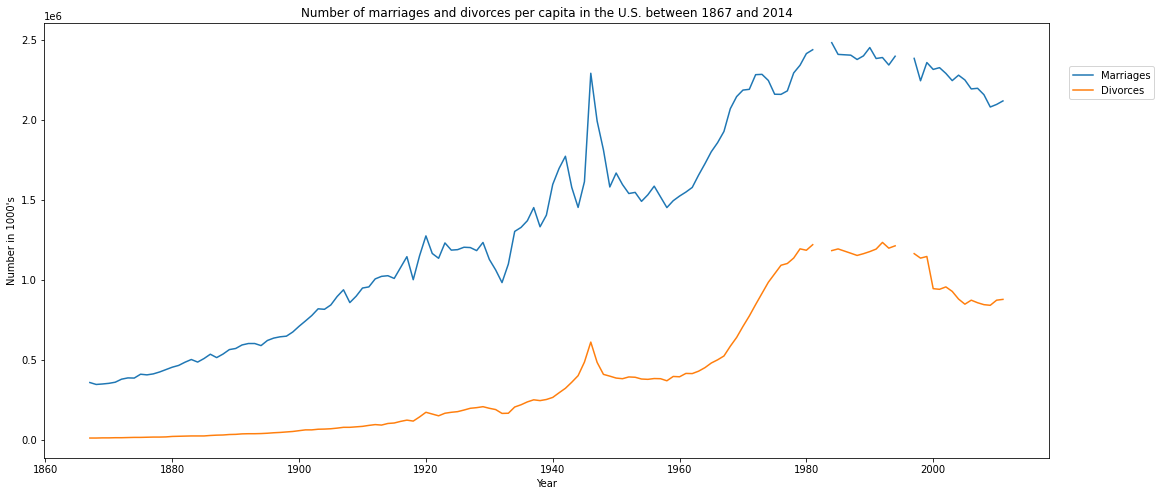

In [9]:
plt.figure (figsize=(18,8))
plt.plot (data6.Year,data6.Marriages, label ='Marriages')
plt.plot (data6.Year,data6.Divorces, label = 'Divorces' )

plt.legend(bbox_to_anchor=(1.02, 0.9), loc='upper left', borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Number in 1000\'s')
plt.title('Number of marriages and divorces per capita in the U.S. between 1867 and 2014')


plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [359]:
data6.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


Text(0.5, 1.0, 'Number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. ')

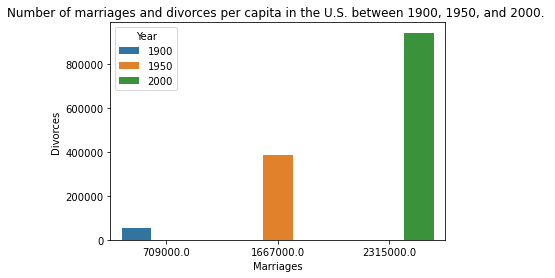

In [401]:
new_data = data6[((data6.Year == 1900) | (data6.Year == 1950) | (data6.Year == 2000))]
sns.barplot(new_data.Marriages, new_data.Divorces, hue = new_data.Year, data= new_data )


plt.title('Number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. ')

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [402]:
data8 = pd.read_csv('actor_kill_counts.csv')

In [412]:
data8.sort_values(by = 'Count', inplace = True)
data8.head()

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207


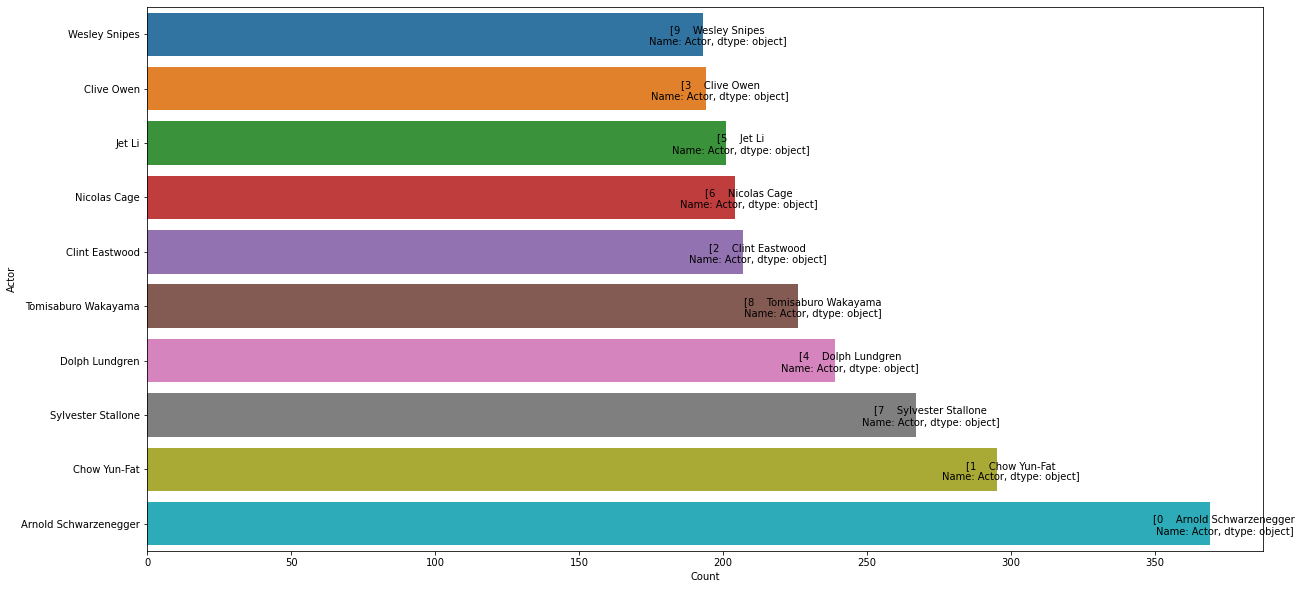

In [454]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data8.Count, data8.Actor)

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{}'.format([data8.Actor[data8.Count == width]]), ha='center', va='center')

    


# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [455]:
data9 = pd.read_csv('roman-emperor-reigns.csv')

In [456]:
data9.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


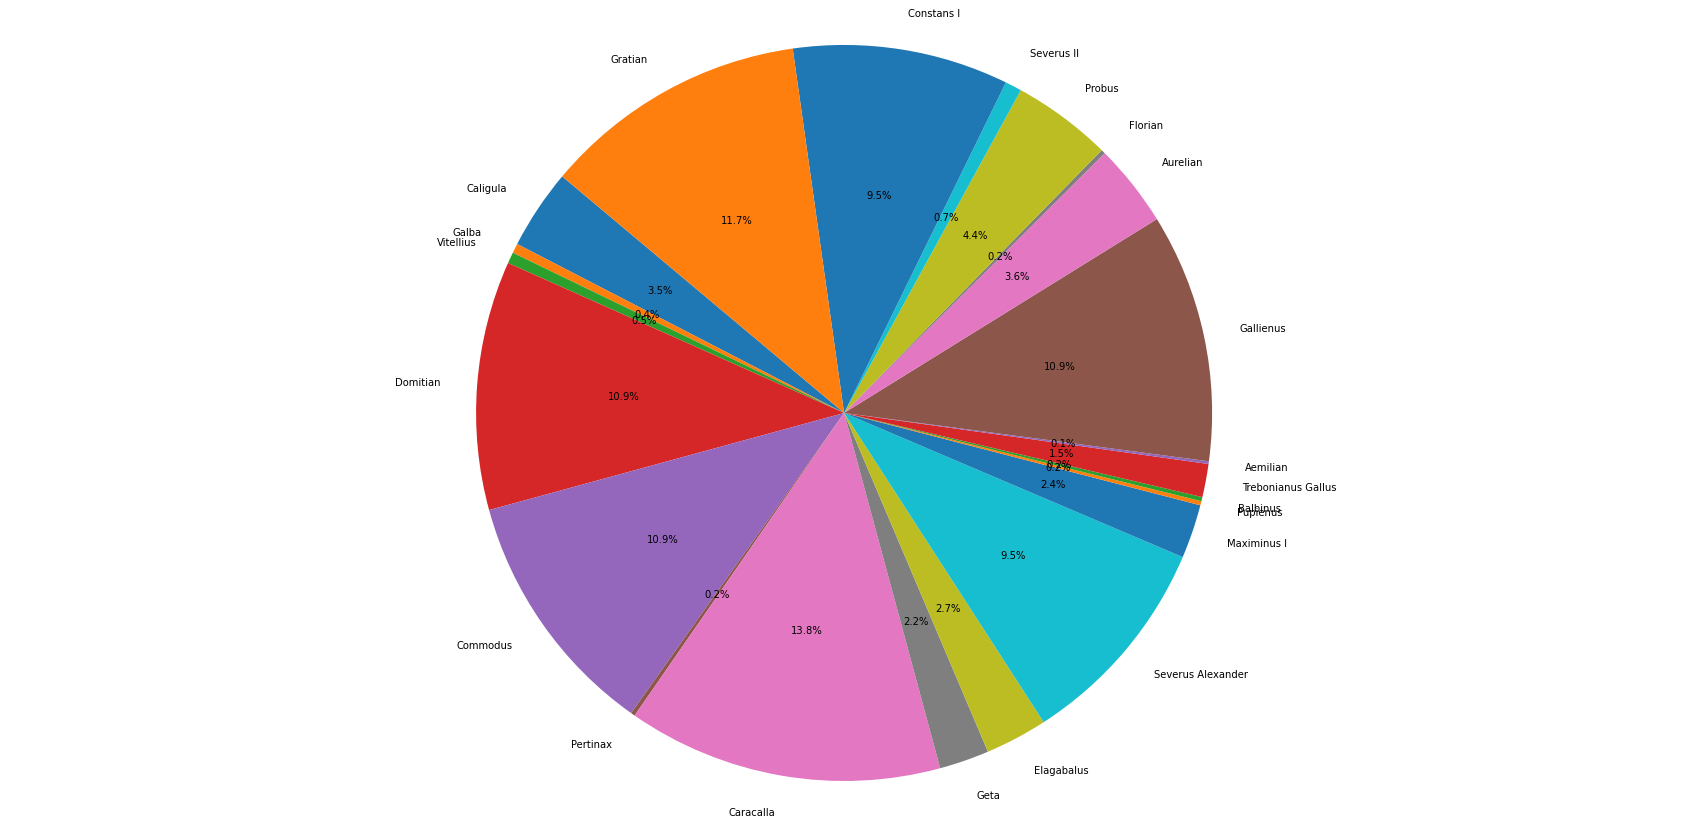

In [494]:
new_data9 = data9[data9.Cause_of_Death == 'Assassinated']


plt.figure(figsize=(30,15))
plt.pie(new_data9.Length_of_Reign, labels=new_data9.Emperor,
autopct='%1.1f%%', startangle=140)

plt.axis('equal');

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.


In [495]:
data10 = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

In [499]:
data10

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


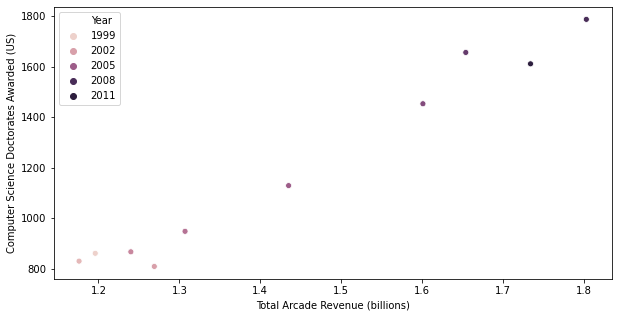

In [504]:
plt.figure(figsize=(10,5))
sns.scatterplot(data10['Total Arcade Revenue (billions)'], data10['Computer Science Doctorates Awarded (US)'],
               hue = data10.Year)